In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from project import handling_missing_values

In [2]:
data = pd.read_csv('train.csv')

In [3]:
handling_missing_values(data)

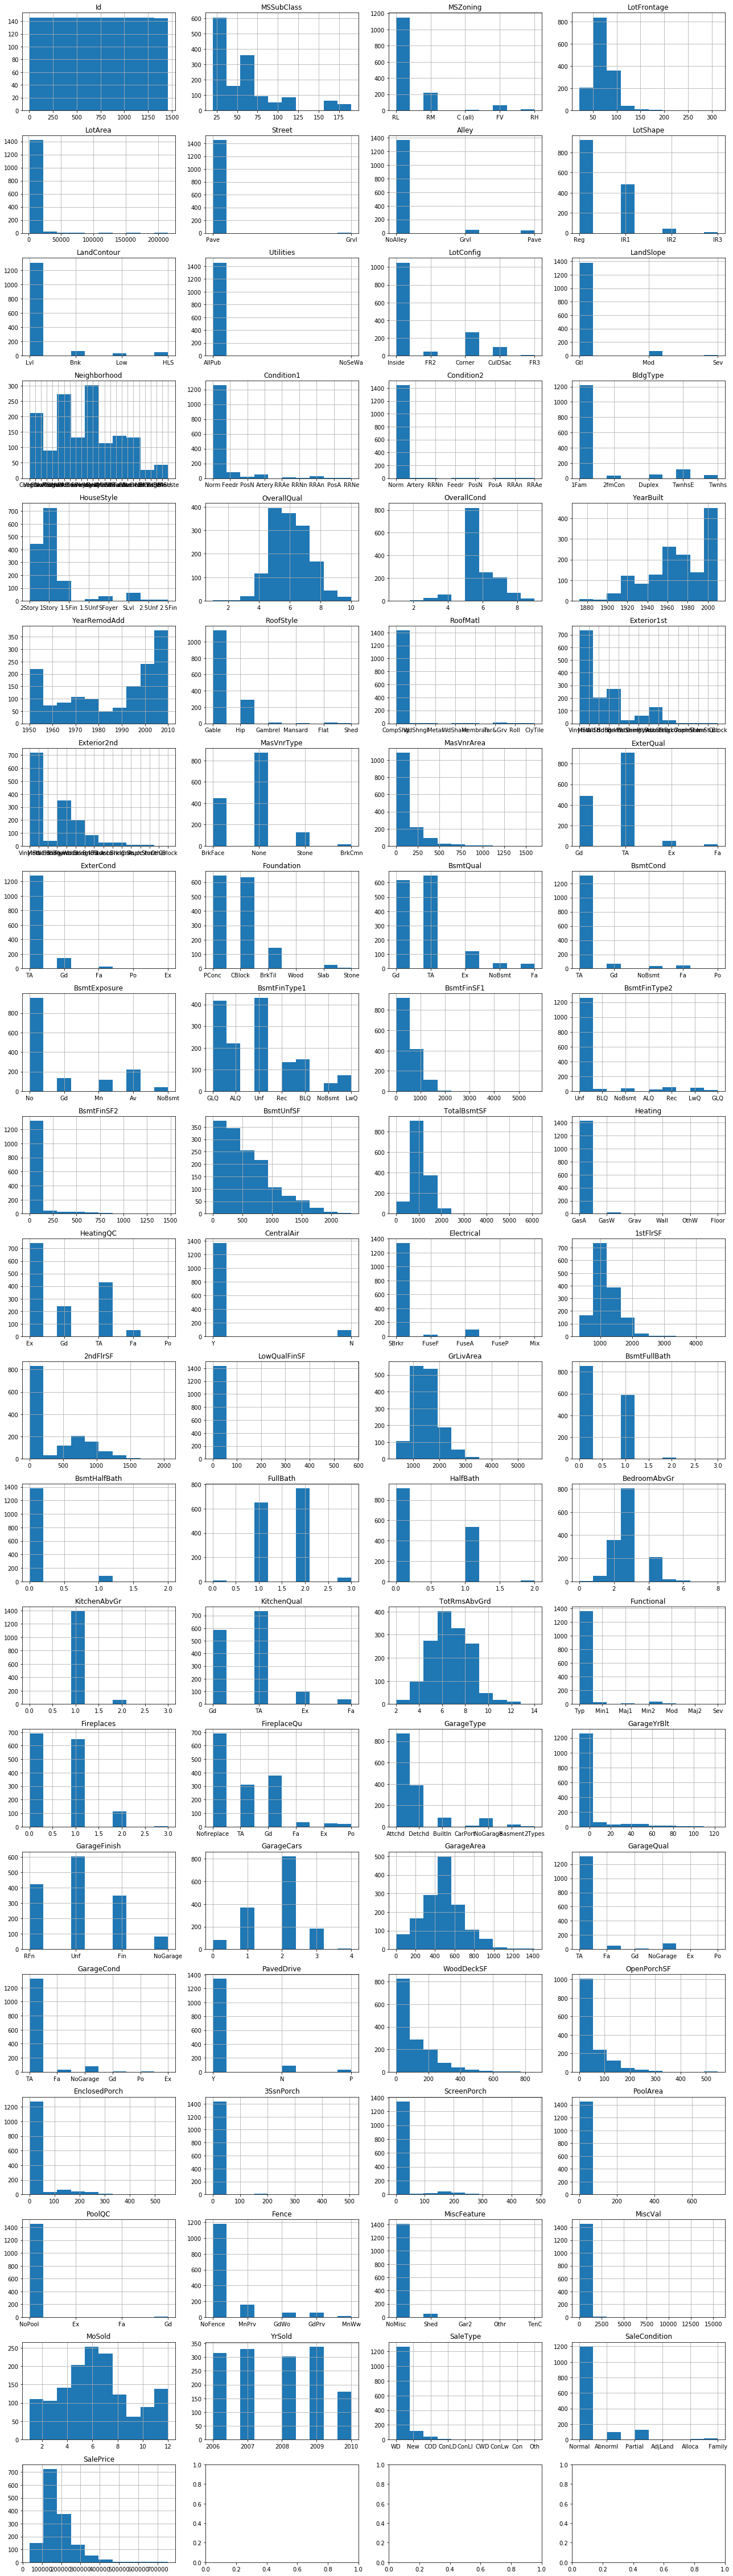

In [4]:
def hist_data_columns(data, columns=data.columns, ncols=4):
    nrows = len(columns) // ncols + 1
    fig, axs = plt.subplots(nrows, ncols, figsize=(18,nrows*3))
    for ax, column in zip(axs.ravel(), columns):
        data[column].hist(ax=ax)
        ax.set_title(column)
    
    fig.tight_layout()
    
hist_data_columns(data)

In [5]:
data[data.LowQualFinSF != 0].loc[:, ['Electrical', 'Utilities', 'Condition2', 'RoofMatl']];

In [6]:
data = data.drop('Street', axis=1)

In [7]:
data = data.drop('Utilities', axis=1)

In [8]:
data = data.drop('Condition2', axis=1)

In [9]:
len(data.RoofMatl[data.RoofMatl != 'CompShg'])

26

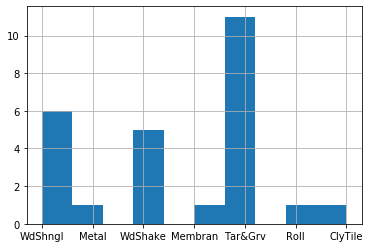

In [10]:
data.RoofMatl[data.RoofMatl != 'CompShg'].hist()

In [11]:
data = data.drop ('RoofMatl', axis=1)

In [12]:
data.Heating[data.Heating != 'GasA'].value_counts()

GasW     18
Grav      7
Wall      4
OthW      2
Floor     1
Name: Heating, dtype: int64

In [13]:
data = data.drop('Heating', axis=1)

In [14]:
data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [15]:
len(data[data.LowQualFinSF != 0])

26

In [16]:
data = data.drop('LowQualFinSF', axis=1)

In [17]:
data.Functional.value_counts()

Typ     1359
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [18]:
set(data.Functional)

{'Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ'}

In [19]:
len(data['3SsnPorch'][data['3SsnPorch']!=0])

24

In [20]:
data = data.drop('3SsnPorch', axis=1)

In [21]:
sum(data.ScreenPorch != 0)

116

In [22]:
data.PoolArea.value_counts()

0      1452
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [23]:
data = data.drop('PoolArea', axis=1)

In [24]:
data.PoolQC.value_counts()

NoPool    1452
Gd           3
Ex           2
Fa           2
Name: PoolQC, dtype: int64

In [25]:
set(data.PoolQC)

{'Ex', 'Fa', 'Gd', 'NoPool'}

In [26]:
data[data.MiscVal == 0].MiscFeature.value_counts()

NoMisc    1405
Shed         1
Othr         1
Name: MiscFeature, dtype: int64

In [27]:
data = data.drop('MiscFeature', axis=1)

In [28]:
data = data.drop('MoSold', axis=1)

In [29]:
data.SaleType.value_counts()

WD       1266
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [30]:
data.BsmtCond = data.BsmtCond.map({'Ex':5 ,'Gd':4 , 'TA':3 ,'Fa':2 ,'Po':1 , 'NoBsmt':0})
data.BsmtQual = data.BsmtQual.map({'Ex':5 ,'Gd':4 , 'TA':3 ,'Fa':2 ,'Po':1 , 'NoBsmt':0})
data.BsmtExposure = data.BsmtExposure.map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NoBsmt':0})
data.BsmtFinType1 = data.BsmtFinType1.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NoBsmt':0})
data.BsmtFinType2 = data.BsmtFinType2.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NoBsmt':0})

data.GarageCond = data.GarageCond.map({'NoGarage':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data.GarageQual = data.GarageQual.map({'NoGarage':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
data.GarageFinish = data.GarageFinish.map({'Fin':3, 'RFn':2, 'Unf':1, 'NoGarage':0})
data.PavedDrive = data.PavedDrive.map({'Y':3,'P':2, 'N':1 })

data.MSZoning = data.MSZoning.map({'FV':1,'C (all)':2,"RL":3,'RM':4,'RH':5})
data.Alley = data.Alley.map({'NoAlley':0,'Grvl':1, 'Pave':1})
data.LotShape = data.LotShape.map({'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1})
data.ExterCond = data.ExterCond.map({"Ex":5,'Gd':4,'TA':3,'Fa':2,'Po':1})
data.ExterQual = data.ExterQual.map({"Ex":5,'Gd':4,'TA':3,'Fa':2,'Po':1})

data.CentralAir = data.CentralAir.map({'Y':1, 'N':0})
data.HeatingQC = data.HeatingQC.map({"Ex":5,'Gd':4,'TA':3,'Fa':2,'Po':1})
data.FireplaceQu = data.FireplaceQu.map({"Ex":5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'Nofireplace':0})
data.KitchenQual = data.KitchenQual.map({"Ex":5,'Gd':4,'TA':3,'Fa':2,'Po':1})
data.PoolQC = data.PoolQC.map({"Ex":4,'Gd':3,'TA':2,'Fa':1,'NoPool':0})
data.Fence = data.Fence.map({'GdPrv':4 , 'MnPrv':3 , 'GdWo':2 , 'MnWw':1 , 'NoFence':0})

data.LandSlope = data.LandSlope.map({'Sev':2, 'Mod':1, 'Gtl':0})
data.Functional = data.Functional.map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1})
data.LandContour = data.LandContour.map({'Lvl':0,'Bnk':1, 'Low':1, 'HLS':1})
data.Electrical = data.Electrical.map({'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':0, 'SBrkr':4})

data.Functional = data.Functional.map({'Maj1':3, 'Maj2':3, 'Min1':1, 'Min2':1, 'Mod':2, 'Sev':4, 'Typ':0})
data.PoolQC = data.PoolQC.map({'Ex':4, 'Fa':1, 'Gd':3, 'NoPool':0})


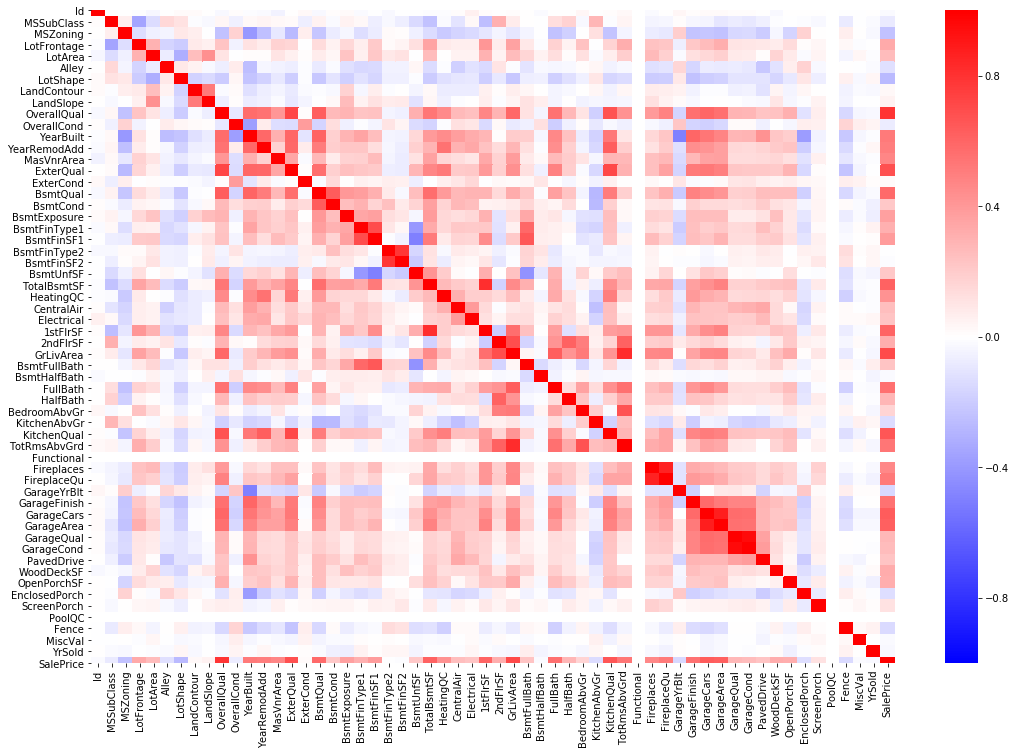

In [31]:
def heatmap(data):
    plt.figure(figsize=(18,12))
    corr = data.corr()
    sns.heatmap(corr, vmin=-1, vmax=1, cmap='bwr')
    
heatmap(data)

In [32]:
data = data.drop('Functional', axis=1)

In [33]:
data = data.drop('PoolQC', axis=1)

In [34]:
data = data.drop('BsmtFinType2', axis=1)

In [35]:
data.loc[:, ['GarageQual', 'GarageCond']].corr()

,GarageQual,GarageCond
GarageQual,1.00000,0.95917
GarageCond,0.95917,1.00000


In [36]:
data = data.drop('GarageQual', axis=1)

In [37]:
data.loc[:, ['GarageArea', 'GarageCars']].corr()

,GarageArea,GarageCars
GarageArea,1.000000,0.882613
GarageCars,0.882613,1.000000


In [38]:
data = data.drop('GarageCars', axis=1)

In [39]:
data.loc[:, ['FireplaceQu', 'Fireplaces']].corr()

,FireplaceQu,Fireplaces
FireplaceQu,1.000000,0.863152
Fireplaces,0.863152,1.000000


In [40]:
data = data.drop('FireplaceQu', axis=1)

In [41]:
data.loc[:, ['BsmtHalfBath', 'SalePrice']].corr()

,BsmtHalfBath,SalePrice
BsmtHalfBath,1.000000,-0.016873
SalePrice,-0.016873,1.000000


In [42]:
data = data.drop('BsmtHalfBath', axis=1)

In [43]:
data.loc[:, ['BsmtFinSF2', 'SalePrice']].corr()

,BsmtFinSF2,SalePrice
BsmtFinSF2,1.000000,-0.011412
SalePrice,-0.011412,1.000000


In [44]:
data = data.drop('BsmtFinSF2', axis=1)

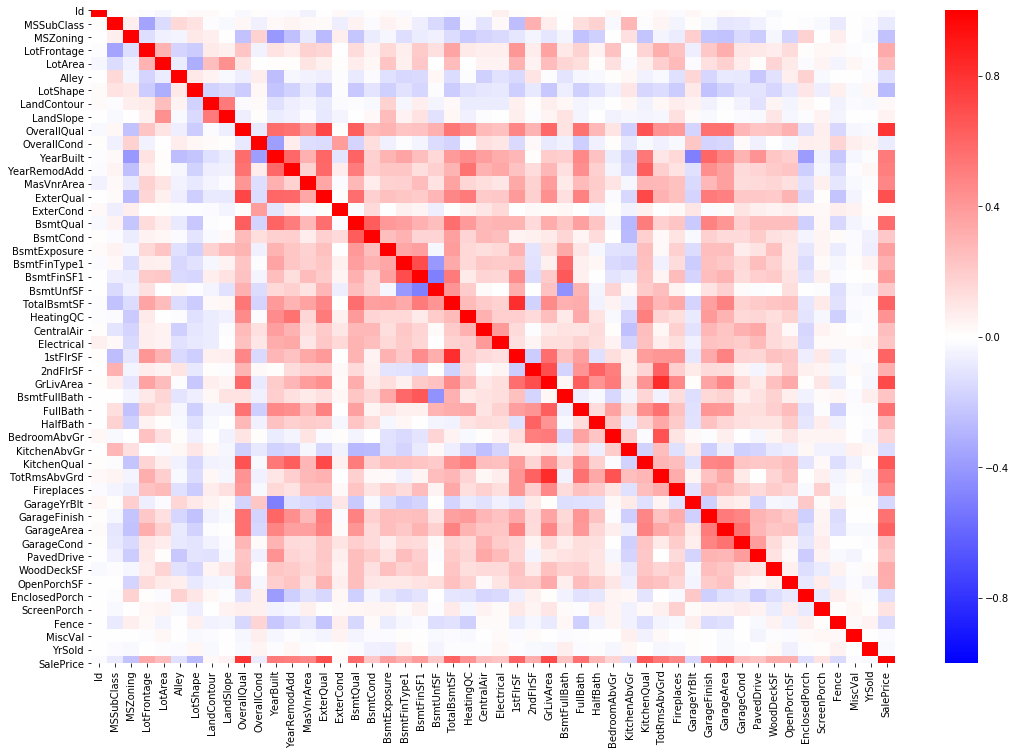

In [45]:
heatmap(data)

In [46]:
data = data.drop('Id', axis=1)

In [47]:
numerical_data = pd.get_dummies(data, drop_first=True)

In [48]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 157 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(46), uint8(108)
memory usage: 723.8 KB


In [49]:
numerical_data.to_csv('Numerical_train.csv')